In [2]:
# Basic library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. Load the training data
df = pd.read_csv("/Users/adamhealey/Downloads/Training.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4920, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
# 1. Load the testing data
df2 = pd.read_csv("/Users/adamhealey/Downloads/Testing.csv")
print("Dataset shape:", df2.shape)
df2.head()

Dataset shape: (42, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


First glance at this dataset shows that it has been improperly split.  The test dataset is only approximately 1% of the size of the training dataset.

Best practices for data science and machine learning suggest the test set should be comprised on random subset of approximately 20% of the dataset (to ensure accurate training of predictive models).

To remedy this, both training and test datasets will be re-combined and properly split using sklearn.

Further, exploratory data analysis will be performed on the full dataset to understand the underlying features before starting modeling.

In [7]:
#step 1- looking at the shape of each dataset shows a different number of columns. 
#this will need to be fixed before combining the two together.

#look at column names and look to see which is different between the test and training set

#save the column names of each dataframe to a set
colSet1 = set(df.columns.tolist())
colSet2 = set(df2.columns.tolist())

#use set intersection to find which columns are not in both datatsets
diff = colSet1 - colSet2
print(diff)

{'Unnamed: 133'}


In [8]:
#drop that column
df = df.drop(columns=['Unnamed: 133'])


In [10]:
#re-check to ensure both dataframes have the same columns
colSet1 = set(df.columns.tolist())
colSet2 = set(df2.columns.tolist())
diff = colSet1 - colSet2
print(diff)

#check reverse as well:
diff2 = colSet1 - colSet2
print(diff2)


set()
set()


In [11]:
#both sets are empty.  Check the df shapes one last time before combining
print(df.shape)
print(df2.shape)

(4920, 133)
(42, 133)


In [12]:
#Excellent.  Use pandas concatenate to combine rows of each dataset.
#also, check first to make sure the columns are in the same order in both datsets

mergedDF = pd.concat([df, df2[df.columns]], # this ensures the correct ordering by calling df colummns first
                     ignore_index=True)
mergedDF.shape

(4962, 133)

Now that we have our newly combined dataset, exploratory analysis can begin.

Questions to explore in the dataset:
1. How clean is the dataset?  Are there missing data or symptoms that are never reported?

2. What is the distribution of symptoms among individuals? 

3. How many symptoms in total are present? How do symptoms cluster with one another?

4. Are there individuals with identical symptom patterns?

In [15]:
#Question 1- how clean is the dataset?
#first, the prognosis column should be removed as it is a predictor, not a feature
featuresDF = mergedDF.drop(columns=['prognosis'])
# are there NAs?
na_cols = featuresDF.columns[featuresDF.isna().any()] #get the names of the columns containing NAs
print("Columns with NaNs:", na_cols.tolist())

#checking for symptoms that are never observed among individuals
zero_sum_cols = featuresDF.columns[featuresDF.sum() == 0]

print("Columns with sum = 0:", list(zero_sum_cols))

Columns with NaNs: []
Columns with sum = 0: ['fluid_overload']


Fluid_overload is never reported as a symptom.

There are no NAs present in the feature columns

In [16]:
#Question 2: what is the distribution of symptoms among individuals?
#This is a binary matrix with no missing values so i can simply count the number of 1s per row and calculate the mean
avgSymptoms = featuresDF.sum(axis=1).mean()
avgSymptoms

7.4516324062877874

In [ ]:
#the average number of symptoms per individual is 7.4.  

Text(0, 0.5, 'Symptom Counts')

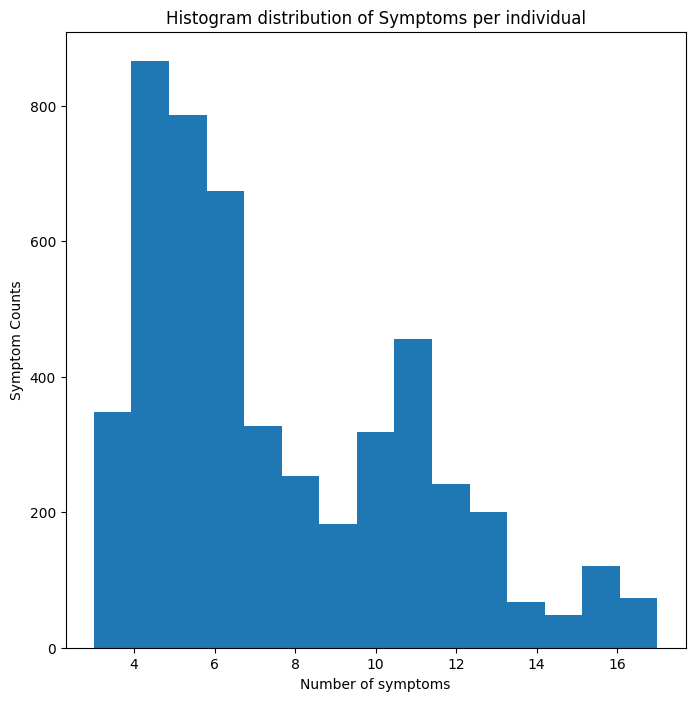

In [18]:
#Lets take a look at the total distribution of symptoms
plt.figure(figsize=(8,8))
plt.grid(False)
plt.hist(featuresDF.sum(axis=1), 
         bins = 15)
plt.title("Histogram distribution of Symptoms per individual")
plt.xlabel("Number of symptoms")
plt.ylabel("Symptom Counts")

In [19]:
#another way to think about this is: What is the average number of symptoms per prognosis?

#what is the average number of symptoms per prognosis?
avg_PrognosisCount = mergedDF.groupby('prognosis').apply( #groupby the prognosis predictor
    lambda x: x.select_dtypes(include='number').sum(axis=1).mean() #sum and average the binary count of ones in numeric columns
).reset_index(name='avg_symptomCount_perPrognosis') # name the new column of interest

print(avg_PrognosisCount)

                                  prognosis  avg_symptomCount_perPrognosis
0   (vertigo) Paroymsal  Positional Vertigo                       5.652893
1                                      AIDS                       3.652893
2                                      Acne                       3.652893
3                       Alcoholic hepatitis                       6.652893
4                                   Allergy                       3.603306
5                                 Arthritis                       4.752066
6                          Bronchial Asthma                       5.603306
7                      Cervical spondylosis                       4.652893
8                               Chicken pox                      10.553719
9                       Chronic cholestasis                       6.652893
10                              Common Cold                      16.603306
11                                   Dengue                      13.553719
12                       

/var/folders/k8/q6b9qdpd227_4g0sfc757j6m0000gp/T/ipykernel_1755/2154903526.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_PrognosisCount = mergedDF.groupby('prognosis').apply( #groupby the prognosis predictor


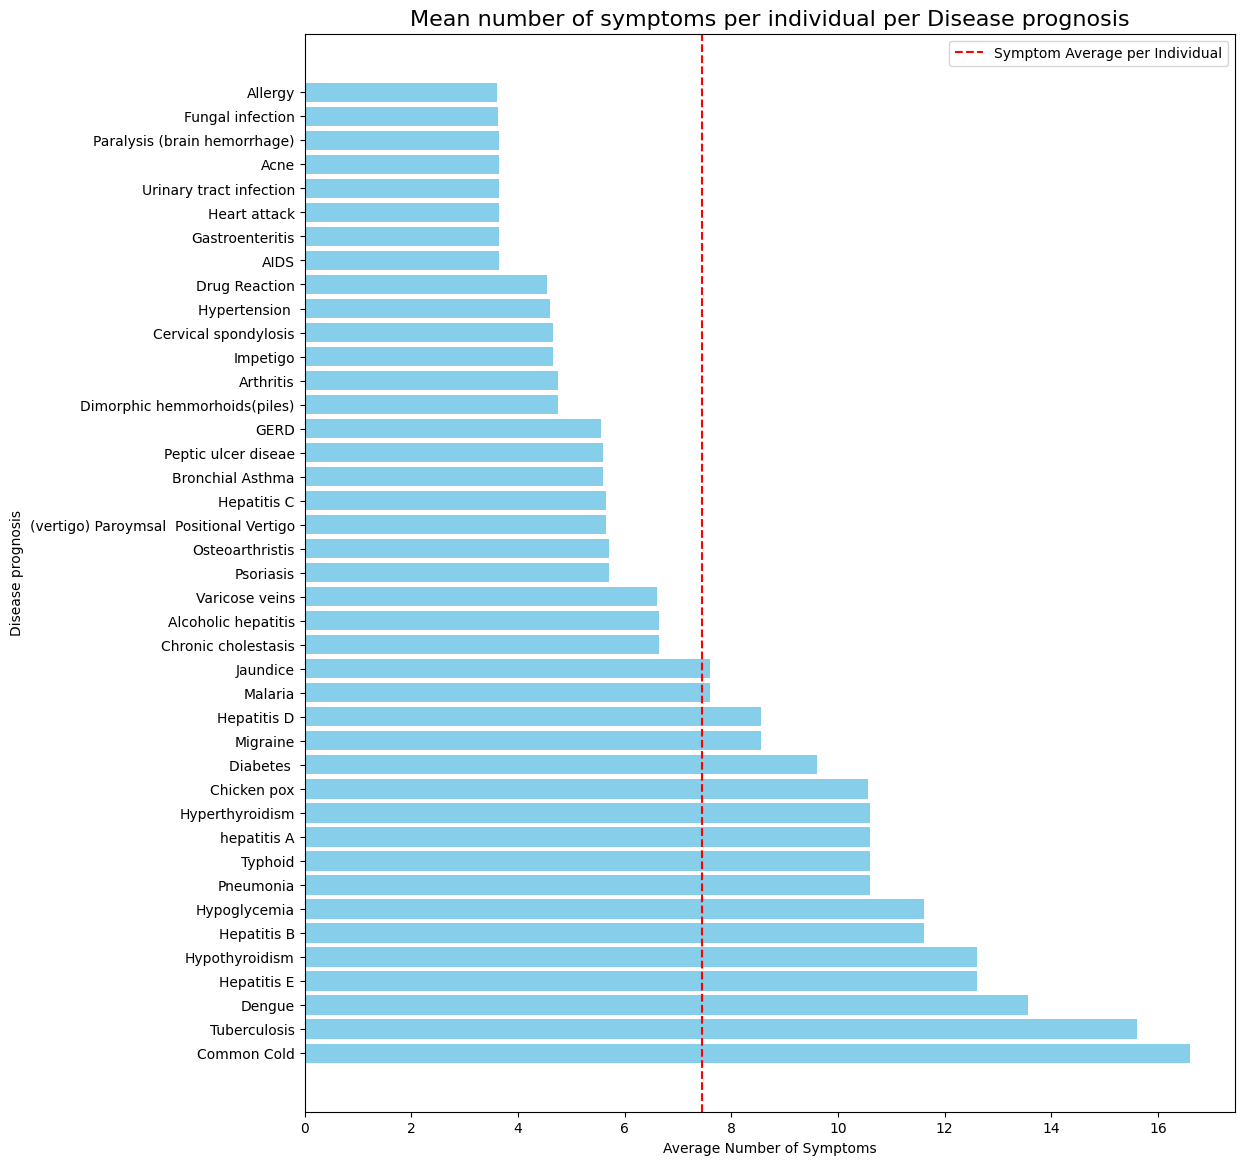

In [34]:
#Let's summarize in a barplot:

#first, sort the data so its easier to read.
avg_PrognosisCount = avg_PrognosisCount.sort_values('avg_symptomCount_perPrognosis', ascending=False)

#set the size of the plot and turn off the background grid
plt.figure(figsize=(12,14))
plt.grid(False)

#Generate a horizontal barchart of average number of symptoms by prognosis
plt.barh(avg_PrognosisCount['prognosis'], avg_PrognosisCount['avg_symptomCount_perPrognosis'], color='skyblue')
#add a vertical line to show the average number of symptoms per individual
plt.axvline(x=avgSymptoms, color='red', linestyle='--', label='Symptom Average per Individual')

#Format the chart
plt.yticks(fontsize=10)
plt.ylabel('Disease prognosis')
plt.xlabel('Average Number of Symptoms')
plt.title('Mean number of symptoms per individual per Disease prognosis', fontsize = 16)

#add legend and visualize
plt.legend()
plt.show()

In [35]:
#Question 3- How are symptoms related to one another?

#Lets cluster the features matrix and visualize
X = featuresDF

#import the libraries that I need
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Compute Jaccard distance among individuals
jaccard_dist = pairwise_distances(X.to_numpy(), metric='jaccard')

#Perform DBSCAN clusters and extract cluster labels
db = DBSCAN(metric='precomputed', eps=0.5, min_samples=5)
labels = db.fit_predict(jaccard_dist)

# The reduce the total number of dimensions down
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)


/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


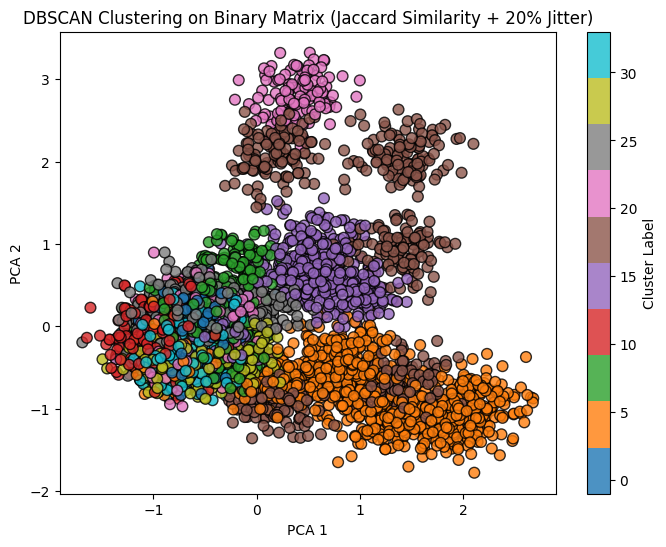

In [37]:
# Next, separate individuals on the plot by using jitter
jitter_strength = 0.2  # 20% jitter
jitter = np.random.normal(scale=jitter_strength, size=X_2d.shape)
X_2d_jittered = X_2d + jitter

# --- 6️⃣ Visualize clusters ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2d_jittered[:, 0],
    X_2d_jittered[:, 1],
    c=labels,
    cmap='tab10',
    s=60,
    alpha=0.8,
    edgecolor='k'
)
plt.title("DBSCAN Clustering on Binary Matrix (Jaccard Similarity + 20% Jitter)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


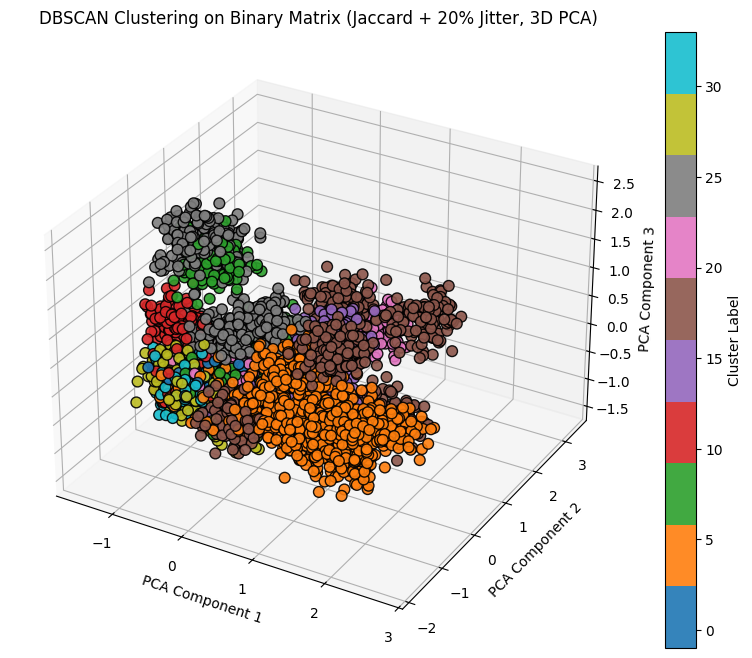

In [38]:
#lets look at the clusters in 3-dimensions

#import
from mpl_toolkits.mplot3d import Axes3D
jaccard_dist = pairwise_distances(X.to_numpy(), metric='jaccard')

#Get clusters and labels
db = DBSCAN(metric='precomputed', eps=0.5, min_samples=5)
labels = db.fit_predict(jaccard_dist)

# Do PCA in 3 dimensions
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

# Jitter the datapoints
jitter_strength = 0.2
jitter = np.random.normal(scale=jitter_strength, size=X_3d.shape)
X_3d_jittered = X_3d + jitter

# generate a 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_3d_jittered[:, 0],
    X_3d_jittered[:, 1],
    X_3d_jittered[:, 2],
    c=labels,
    cmap='tab10',
    s=60,
    alpha=0.9,
    edgecolor='k'
)

ax.set_title("DBSCAN Clustering on Binary Matrix (Jaccard + 20% Jitter, 3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Add legend and colorbar
plt.colorbar(scatter, ax=ax, label="Cluster Label")
plt.show()

In [39]:
#better visualization but the color labels are wrong. 
# teh same 10 colors are repeating
# Lets generate a function that creates unique colors for categories based on the number of given labels
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import matplotlib.colors as mcolors

# --- 0️⃣ Define the color dictionary function ---
def generate_color_dict(categories):
    """
    Generate a color dictionary for a list of categories.
    Returns hex colors suitable for Plotly.
    """
    n = len(categories)
    color_dict = {}
    
    for i, cat in enumerate(categories):
        # Evenly rotate hue around the HSL color wheel
        hue = (i * 360 / n) % 360
        rgb = mcolors.hsv_to_rgb((hue/360, 0.7, 0.8))  # saturation=0.7, lightness=0.8
        color_dict[cat] = mcolors.to_hex(rgb)
    
    return color_dict

/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33]


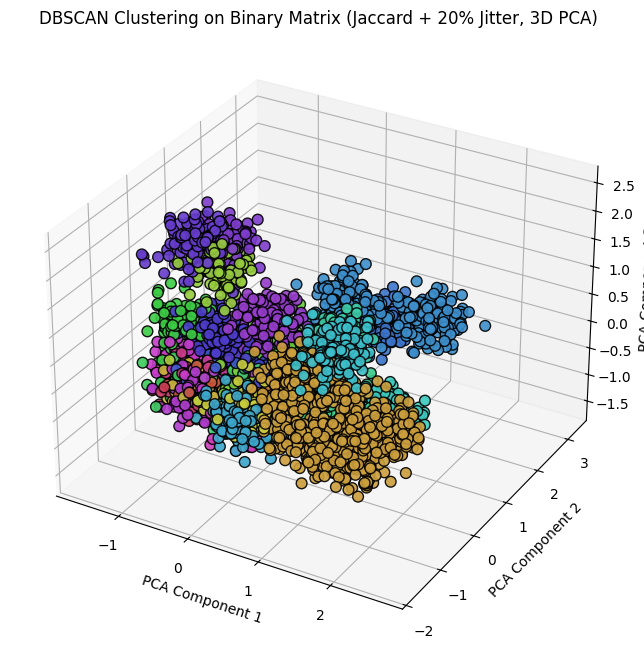

In [43]:
#lets look at the clusters in 3-dimensions with better colors

#import
from mpl_toolkits.mplot3d import Axes3D
jaccard_dist = pairwise_distances(X.to_numpy(), metric='jaccard')

#Get clusters and labels
db = DBSCAN(metric='precomputed', eps=0.5, min_samples=5)
labels = db.fit_predict(jaccard_dist)

#generate new colors
unique_labels = np.unique(labels)
print(unique_labels)
color_dict = generate_color_dict(unique_labels)
# Map each label to its corresponding color
colors = [color_dict[label] for label in labels]


# Do PCA in 3 dimensions
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

# Jitter the datapoints
jitter_strength = 0.2
jitter = np.random.normal(scale=jitter_strength, size=X_3d.shape)
X_3d_jittered = X_3d + jitter

# generate a 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_3d_jittered[:, 0],
    X_3d_jittered[:, 1],
    X_3d_jittered[:, 2],
    c=colors,
    s=60,
    alpha=0.9,
    edgecolor='k'
)

ax.set_title("DBSCAN Clustering on Binary Matrix (Jaccard + 20% Jitter, 3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# # Optional - Add legend and colorbar
# for label in unique_labels:
#     ax.scatter([], [], [], c=color_dict[label], label=f"Cluster {label}")
# ax.legend(title="Cluster Labels")


plt.show()

In [ ]:
#generate and export a 3d plot that can be explored in a browser window:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import matplotlib.colors as mcolors


# Compute distance- try hamming distance this time
hamming_dist = pairwise_distances(X.to_numpy(), metric='hamming')

# --- 3️⃣ Run DBSCAN clustering
db = DBSCAN(metric='hamming', eps=0.55, min_samples=5)
labels = db.fit_predict(hamming_dist)

# Generate 3D PCA
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

# Add jitter to positions
jitter_strength = 0.2
jitter = np.random.normal(scale=jitter_strength, size=X_3d.shape)
X_3d_jittered = X_3d + jitter

# Build color dictionary for clusters 
unique_labels = np.unique(labels)
color_dict = generate_color_dict(unique_labels)

# Generate interactive 3D scatter plot 
fig = go.Figure()

for label in unique_labels:
    mask = labels == label
    cluster_name = f"Cluster {label}" if label != -1 else "Noise"
    fig.add_trace(go.Scatter3d(
        x=X_3d_jittered[mask, 0],
        y=X_3d_jittered[mask, 1],
        z=X_3d_jittered[mask, 2],
        mode='markers',
        marker=dict(
            size=6,
            color=color_dict[label],
            line=dict(width=0.5, color='black'),
            opacity=0.8
        ),
        name=cluster_name,
        hovertext=mergedDF['prognosis'].iloc[mask].tolist()
    ))

# Customize layout of the plot 
fig.update_layout(
    title="DBSCAN Clustering on Disease Symptoms<br>(Hamming Distance + 20% Jitter (For visibility), 3D PCA)",
    scene=dict(
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3'
    ),
    legend_title="Cluster Label",
    width=900,
    height=700,
)

#fig.show()
fig.write_html("/Users/adamhealey/Desktop/dbscan_disease_clusters.html", auto_open=True)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


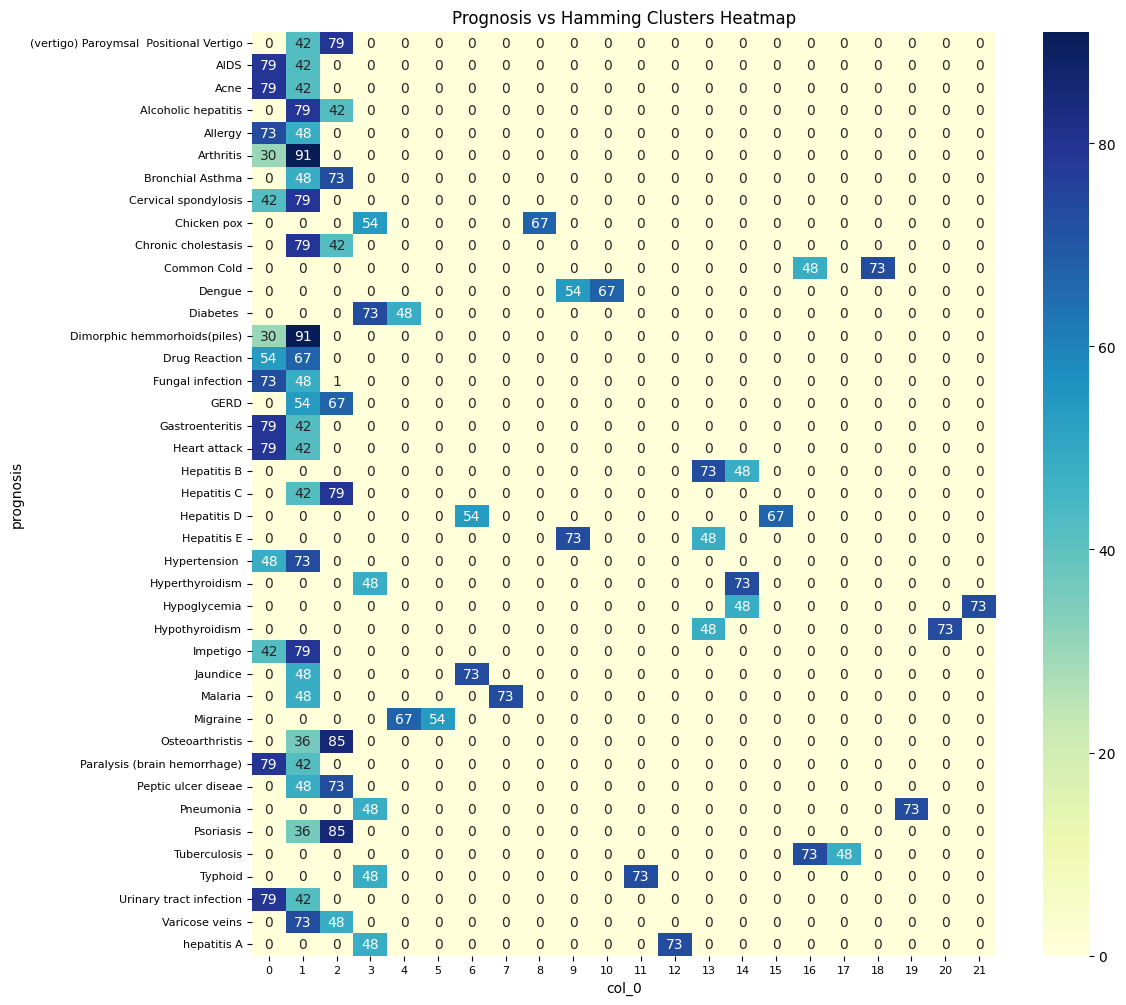

In [ ]:
#inspect the clusters relative to the prognoses to get a sense of what the clusters look like:
# Create a crosstab

true_labels = mergedDF['prognosis'].astype(str) # Replace with your actual column
cluster_labels = labels.astype(str)               # DBSCAN labels from earlier

table = pd.crosstab(mergedDF['prognosis'].astype(str), labels )

plt.figure(figsize=(12,12))
#sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu')

# Make y-axis labels smaller
plt.yticks(fontsize=8)  # adjust number as needed
plt.xticks(fontsize=8)  # optional: shrink x labels too


# Plot heatmap
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Prognosis vs Hamming Clusters Heatmap')
plt.yticks(fontsize=8)  # adjust number as needed
plt.xticks(fontsize=8)  # optional: shrink x labels too

plt.show()

In [ ]:
#some diseases are well defined but others are clumped together 
# within Clusters 0 (noise label) #and 1

In [ ]:
#Question 4- are there individuals (rows) with identical symptom patterns?
# Find duplicate rows (identical across all columns)
duplicate_rows = featuresDF[featuresDF.duplicated(keep=False)]

print(f" Number of individuals with shared symptoms: {duplicate_rows.shape[0]}")
print(f" Percentage of individuals with shared symptoms in dataset: {duplicate_rows.shape[0]/featuresDF.shape[0]}")

 Number of individuals with shared symptoms: 4961
 Percentage of individuals with shared symptoms in dataset: 0.9997984683595325


In [26]:
#Virtually every individual in the symptom dataset share identical symptoms with at least one other person
#How many individuals share symptoms?

#supply a random row number
target_idx = 14


# Find rows that are identical to the given one (excluding itself)
identical_rows = mergedDF[(mergedDF == mergedDF.loc[target_idx]).all(axis=1) & (mergedDF.index != target_idx)]

identical_rows

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
18,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
424,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
428,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
834,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
838,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1244,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1248,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1654,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1658,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2064,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [ ]:
# for the example above, 11 individual share identical symptoms with the individual from 
#column 14.

In [27]:
#for any given individual, how many other people share identical symptoms?
target_idx = 1112

# Find rows that are identical to the given one (excluding itself)
identical_rows = mergedDF[(mergedDF == mergedDF.loc[target_idx]).all(axis=1) & (mergedDF.index != target_idx)]

#how the number of shared prognoses among identical rows
identical_rows['prognosis'].value_counts()

prognosis
Heart attack    11
Name: count, dtype: int64

In [ ]:
#how many counts of individual prognoses are there in the whole dataset?
mergedDF['prognosis'].value_counts()

prognosis
Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
All

In [29]:
#Let's generate a new columm that groups together individuals with identical symptoms:

mergedDF['SymptomGroup'] = pd.factorize([tuple(row) for row in mergedDF.values])[0] + 1  # add 1 to start groups from 1

mergedDF.head()

/var/folders/k8/q6b9qdpd227_4g0sfc757j6m0000gp/T/ipykernel_1755/3681047623.py:3: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  mergedDF['SymptomGroup'] = pd.factorize([tuple(row) for row in mergedDF.values])[0] + 1  # add 1 to start groups from 1


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,SymptomGroup
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,2
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,3
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,5


In [30]:
#how many unique symptom groups are there?

mergedDF['SymptomGroup'].nunique()

305

In [33]:
#only 305 unique combinations of symptoms among nearly 5000 individuals.

#what is the average number of individuals with identical shared symptoms?

mergedDF['SymptomGroup'].value_counts().mean()

16.268852459016394

These duplicated rows pose a signficant challenge to the analysis of this dataset, and the training of models.

Because of the lack of variation within symptom groups, models will always train and predict prognosis perfectly.

Perfect symptom groups and training is unlikely to occur with real symptoms, so we need an alternative approach to training and testing our classifications models.

There are two strategies we can use:
1. Randomly 'jitter' the symptoms to artificially create variation for our models to train on.
2. Go through the dataset and create a 'leave-one-out' approach, where one symptom group per prognosis is removed and used to test the accuracy of the model.

Approach #1 is straightforward and inntuitive, but not biologically meaningful.  Patients would be unlikely to have or report random symptoms, so the accuracy of the classification model would be meaningless.  However, it would be useful to generate a test case to simply test models and see how they behave and perform.

Approach #2 is more appropriate for biological data, since it is more feasible that our classiciation model could be used to test a combination of symptoms that it had not seen before.

Both approaches will be used to understand downstream model performance.

In [59]:
#Approach 1- Artificial variation
from sklearn.model_selection import train_test_split

#first, remove symptom that no individual reported
try:
    mergedDF = mergedDF.drop(columns=['fluid_overload'])
except KeyError:
    pass

#generate the X and y's
X = mergedDF.drop(columns=['prognosis'])
y = mergedDF['prognosis']
##################################
#Randomly flip 0's to 1s (and vice versa) in the features dataframe
X_noisy = X.copy()

# total number of cells
n_cells = X_noisy.size

# number of cells to flip (10%)
n_flip = int(0.15 * n_cells)

# randomly select flat indices to flip
flip_indices = np.random.choice(n_cells, size=n_flip, replace=False)

# convert flat indices to row, col
rows, cols = np.unravel_index(flip_indices, X_noisy.shape)

# flip the selected cells
X_noisy.values[rows, cols] = 1 - X_noisy.values[rows, cols]

##################################
# #use this code block for teh leave one out approach
# X_train = df_remaining.drop(columns=['prognosis','SymptomGroup'])
# X_test = removed_rows.drop(columns=['prognosis','SymptomGroup'])
# y_train = df_remaining['prognosis']
# y_test = removed_rows['prognosis']

############################################



# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_noisy, 
                                                    y, 
                                                    test_size=0.2, # 20% test size
                                                    random_state=42)



In [60]:
#Model number 1- Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500,
                             random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [61]:
# predict prognosis
y_pred = clf.predict(X_test)

In [62]:
#lets see how it performed
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 23]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.85      1.00      0.92        17
                                   AIDS       1.00      0.84      0.92        32
                                   Acne       1.00      0.88      0.94        26
                    Alcoholic hepatitis       1.00      0.88      0.94        26
                                Allergy       0.95      0.76      0.84        25
                              Arthritis       1.00      0.88      0.94        26
                       Bronchial Asthma       0.88      0.97      0.92        31
                   Cervical spondylosis       0.92      0.96      0.94        24
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic chole

In [ ]:
#the code works and is clearly impacted by the number of cells that randomly get
#flipped between 0 and 1

In [64]:
# Lets try logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', 
                         solver='lbfgs', 
                         max_iter=2000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



0.8620342396777442


/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Encode target
le = LabelEncoder()
#y_encoded = le.fit_transform(y)
y_encoded = le.fit_transform(y_train)
y_categorical = to_categorical(y_encoded)  # one-hot encoding

#######################
#block for new training an test
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)


# Build a simple feedforward NN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    #Dense(64, activation='relu', input_shape=(131,)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(X_train, to_categorical(le.transform(y_train)), epochs=30, batch_size=32, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(X_test, to_categorical(le.transform(y_test)))
print(f"Test Accuracy: {acc:.3f}")


Epoch 1/30


/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0198 - loss: 10.3617 - val_accuracy: 0.0290 - val_loss: 3.7206
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0378 - loss: 3.8580 - val_accuracy: 0.0516 - val_loss: 3.7000
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0542 - loss: 3.7317 - val_accuracy: 0.0579 - val_loss: 3.6205
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0609 - loss: 3.5842 - val_accuracy: 0.0642 - val_loss: 3.4683
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0628 - loss: 3.4823 - val_accuracy: 0.0945 - val_loss: 3.3698
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0826 - loss: 3.3965 - val_accuracy: 0.1222 - val_loss: 3.2057
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1025 - loss: 3.2552 - val_accuracy: 0.1486 - val_loss: 3.0612
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1125 - loss: 3.1246 - val_accuracy: 0.1524 - val

In [ ]:
#based on testing with artificially noisy data, random forest is the best predictor of prognosis

In [67]:
#lets try out our novel- leave one out approach:

#First, set up the dataframes

#create my own training set, with symptom combinations 
import pandas as pd

df1 = mergedDF.copy()

# Count how many rows each prognosis has
counts = df1.groupby('prognosis')['SymptomGroup'].transform('count')

# Keep only prognoses with more than 1 group
multi_group_df = df1[counts > 1]

# Randomly pick one unique SymptomGroup per prognosis
def pick_one(x):
    return np.random.choice(x)  # safer than pd.Series(...).sample(1)

random_groups = multi_group_df.groupby('prognosis')['SymptomGroup'].unique().apply(pick_one).reset_index()
random_groups.columns = ['prognosis', 'SymptomGroup']

# Remove all rows matching these prognosis + SymptomGroup pairs
removed_rows = pd.merge(df1, random_groups, on=['prognosis', 'SymptomGroup'], how='inner')

# Keep remaining rows
df_remaining = df1.merge(random_groups, on=['prognosis','SymptomGroup'], how='outer', indicator=True)
df_remaining = df_remaining[df_remaining['_merge'] == 'left_only'].drop(columns=['_merge'])


print(removed_rows.shape)
print(df_remaining.shape)




(519, 133)
(4443, 133)


In [69]:
#set up training / test data
X_train = df_remaining.drop(columns=['prognosis','SymptomGroup'])
X_test = removed_rows.drop(columns=['prognosis','SymptomGroup'])
y_train = df_remaining['prognosis']
y_test = removed_rows['prognosis']


In [70]:
#re-test the models above to see how they perform:


In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500,
                             random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=0))

[[ 6  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  6]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         6
                                   AIDS       1.00      1.00      1.00        12
                                   Acne       1.00      1.00      1.00         6
                    Alcoholic hepatitis       1.00      1.00      1.00        79
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         6
                       Bronchial Asthma       1.00      1.00      1.00        12
                   Cervical spondylosis       1.00      1.00      1.00         6
                            Chicken pox       1.00      1.00      1.00         6
                    Chronic chole

In [73]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0


/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



In [75]:


# Encode target
le = LabelEncoder()
#y_encoded = le.fit_transform(y)
y_encoded = le.fit_transform(y_train)
y_categorical = to_categorical(y_encoded)  # one-hot encoding

#######################
#block for new training an test
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)


# Build a simple feedforward NN
model = Sequential([
    Dense(64, activation='relu', input_shape=(131,)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(X_train, to_categorical(le.transform(y_train)), epochs=30, batch_size=32, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(X_test, to_categorical(le.transform(y_test)))
print(f"Test Accuracy: {acc:.3f}")


Epoch 1/30


/Users/adamhealey/miniforge3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3454 - loss: 3.2723 - val_accuracy: 0.0000e+00 - val_loss: 5.2423
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9509 - loss: 0.7946 - val_accuracy: 0.0000e+00 - val_loss: 7.5148
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9901 - loss: 0.1343 - val_accuracy: 0.0945 - val_loss: 8.4141
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0477 - val_accuracy: 0.0945 - val_loss: 8.8779
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0273 - val_accuracy: 0.0945 - val_loss: 9.2640
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9996 - loss: 0.0131 - val_accuracy: 0.0945 - val_loss: 9.5536
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.0945 - val_loss: 9.9448
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.094